### Importando as bibliotecas necessárias para iniciar a leitura dos arquivos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Lendo os dados da base única de 2011 a 2021

In [ ]:
df_accidents = pd.read_csv(
    "../databases/acidentes2011_2021.csv"
)
df_accidents.info()

/var/folders/z1/3syxl8gd5ks431s8c9n9mrs00000gn/T/ipykernel_24089/2040409425.py:1: DtypeWarning: Columns (6,7,18,21,26,27,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818892 entries, 0 to 2818891
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      float64
 1   pesid                   float64
 2   data_inversa            object 
 3   dia_semana              object 
 4   horario                 object 
 5   uf                      object 
 6   br                      object 
 7   km                      object 
 8   municipio               object 
 9   causa_acidente          object 
 10  tipo_acidente           object 
 11  classificacao_acidente  object 
 12  fase_dia                object 
 13  sentido_via             object 
 14  condicao_metereologica  object 
 15  tipo_pista              object 
 16  tracado_via             object 
 17  uso_solo                object 
 18  id_veiculo              object 
 19  tipo_veiculo            object 
 20  marca                   object 
 21  ano_fabricacao_veiculo  object 

#### Verificando informações da coluna

In [175]:
df_accidents["br"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2818892 entries, 0 to 2818891
Series name: br
Non-Null Count    Dtype 
--------------    ----- 
2817501 non-null  object
dtypes: object(1)
memory usage: 21.5+ MB


#### Verificando dados estatísticos da coluna antes do tratamento dos dados

In [176]:
df_accidents["br"].describe()

count     2817501
unique        286
top           101
freq       458769
Name: br, dtype: int64

#### Verificando dados faltantes na coluna "br" antes do tratamento

In [177]:
df_accidents["br"].isna().sum()

np.int64(1391)

#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido"

In [178]:
br_column = pd.to_numeric(
    df_accidents["br"], errors="coerce").fillna(0).astype("int")
br_column = br_column.apply(
    lambda data: f'BR-{data}' if data != 0 else "Desconhecido")
df_accidents["br"] = br_column

#### Verificando dados faltantes categorizados como "Desconhecido"

In [180]:
df_accidents[df_accidents["br"] == "Desconhecido"].shape

(1431, 34)

#### Verificando dados estatísticos da coluna após do tratamento dos dados

In [181]:
df_accidents["br"].describe()

count     2818892
unique        181
top        BR-101
freq       470183
Name: br, dtype: object

#### Salvando os dados em um novo CSV após o tratamento de dados das colunas acima para ter uma base mais limpa

In [ ]:
with open("../databases/acidentes2011_2021_tratado_v1.csv", "w") as f:
    df_accidents.to_csv(f, index=False)

#### Gerando gráfico de pizza dos dados para uma análise univariada, com os top 5 rodovias com mais acidentes para uma melhor visualização.

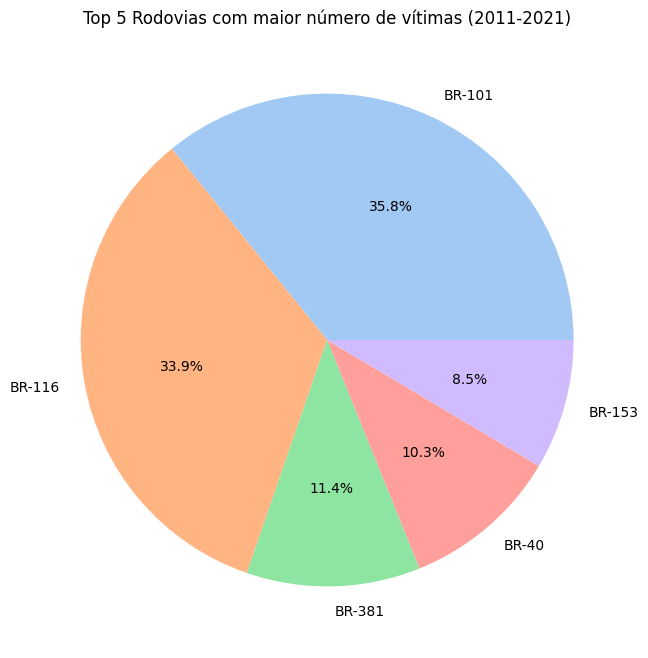

In [229]:
top_n = 5

df_br = df_accidents["br"].value_counts().nlargest(top_n).reset_index()
df_br.columns = ["br", "Frequência"]

plt.figure(figsize=(8, 8))
plt.pie(df_br["Frequência"], labels=df_br["br"],
        autopct="%1.1f%%", colors=sns.color_palette("pastel", len(df_br)))
plt.title(f'Top {top_n} Rodovias com maior número de vítimas (2011-2021)')
plt.show()

#### Gerando gráfico de histograma dos dados para uma análise univariada, com os top 5 rodovias com mais acidentes para uma melhor visualização.

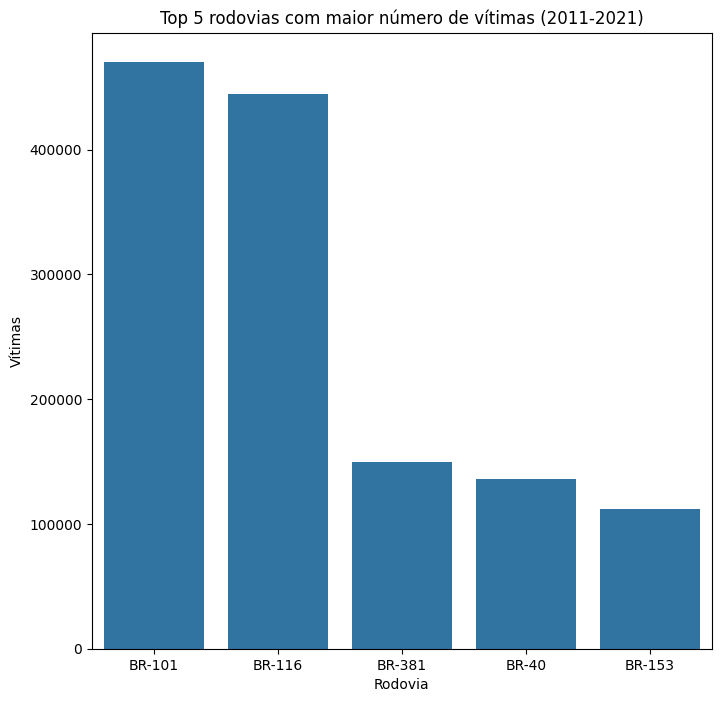

In [227]:
top_n = 5

df_br = df_accidents['br'].value_counts().nlargest(top_n).reset_index()
df_br.columns = ['br', 'Frequência']

plt.figure(figsize=(8, 8))
sns.barplot(x='br', y='Frequência', data=df_br)

plt.xlabel("Rodovia")
plt.ylabel("Vítimas")
plt.title("Top 5 rodovias com maior número de vítimas (2011-2021)")
plt.show()